In [34]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import os.path as osp
import numpy as np
from spinup.utils.plot import get_datasets, get_all_datasets, plot_data

In [35]:
datasets, configs = get_all_datasets(['/Users/ppiech/openaigym/spindata/v2.1-3-mountaincar/'])

# Show a sample of the data
pd.concat(datasets, ignore_index=True)

Plotting from...

/Users/ppiech/openaigym/spindata/v2.1-3-mountaincar/



/Users/ppiech/openaigym/spinningup/env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,ActionError - Actions,ActionError - Goals,AdvantageMean - Actions,AdvantageMean - Goals,AdvantageMean - Goals2,AverageEpRet,Condition1,Condition2,Curiosity - Goals2,Entropy - Actions,...,StabilityReward - Goals,StdEpRet,StopIter - Actions,StopIter - Goals,StopIter - Goals2,TotalEnvInteracts,Unit,VVals - Actions,VVals - Goals,VVals - Goals2
0,0.497414,0.486630,-1.178611,-0.961812,-7.603706,-200.0,v2.1-3_mountaincar-v0,v2.1-3_mountaincar-v0-8,NaN,1.091908,...,0.499199,0.0,79.0,79.0,79.0,2000,7,0.151598,-0.014475,-0.040357
1,0.483831,0.465345,-0.515458,-0.464280,-5.486845,-200.0,v2.1-3_mountaincar-v0,v2.1-3_mountaincar-v0-8,NaN,1.088694,...,0.496510,0.0,79.0,79.0,79.0,4000,7,-0.513116,-0.523447,-2.704679
2,0.472357,0.442357,-0.492335,-0.494988,-0.986768,-200.0,v2.1-3_mountaincar-v0,v2.1-3_mountaincar-v0-8,NaN,1.090652,...,0.476212,0.0,79.0,79.0,79.0,6000,7,-0.533593,-0.536533,-8.359716
3,0.463092,0.415695,-0.487832,-0.465063,-0.035197,-200.0,v2.1-3_mountaincar-v0,v2.1-3_mountaincar-v0-8,NaN,1.068475,...,0.476498,0.0,42.0,47.0,79.0,8000,7,-0.531689,-0.564974,-9.555305
4,0.446805,0.387693,-0.479625,-0.476723,-0.073368,-200.0,v2.1-3_mountaincar-v0,v2.1-3_mountaincar-v0-8,NaN,1.000796,...,0.468831,0.0,79.0,79.0,79.0,10000,7,-0.526810,-0.560287,-9.507746
5,0.433002,0.356438,-0.463048,-0.493077,-0.044120,-200.0,v2.1-3_mountaincar-v0,v2.1-3_mountaincar-v0-8,NaN,0.913678,...,0.460162,0.0,30.0,27.0,78.0,12000,7,-0.526660,-0.563273,-9.544309
6,0.420124,0.328006,-0.468632,-0.507513,-0.046066,-200.0,v2.1-3_mountaincar-v0,v2.1-3_mountaincar-v0-8,NaN,0.803987,...,0.450156,0.0,22.0,22.0,79.0,14000,7,-0.515535,-0.574035,-9.541379
7,0.403779,0.303200,-0.474377,-0.468093,-0.044225,-200.0,v2.1-3_mountaincar-v0,v2.1-3_mountaincar-v0-8,NaN,0.715807,...,0.459357,0.0,29.0,20.0,41.0,16000,7,-0.512764,-0.593661,-9.543467
8,0.395425,0.293887,-0.485492,-0.421957,-0.022841,-200.0,v2.1-3_mountaincar-v0,v2.1-3_mountaincar-v0-8,NaN,0.655898,...,0.485741,0.0,22.0,28.0,43.0,18000,7,-0.527074,-0.587980,-9.570359
9,0.392625,0.279373,-0.467110,-0.464097,-0.037500,-200.0,v2.1-3_mountaincar-v0,v2.1-3_mountaincar-v0-8,NaN,0.631973,...,0.486867,0.0,41.0,79.0,71.0,20000,7,-0.543253,-0.556900,-9.551632


In [37]:
# Show table of parameters used in the experiment, used as guide to graph legends

def config_values(config, paths):
    values = []
    for path in paths:
        value = config
        for name in path.split(':'):
            value = value[name]
        values.append(value)
    return values

columns = ['exp_name', 
           'steps_per_epoch',
#           'use_reward_discount',
#            'goal_discount_rate', 
#           'no_step_reward', 
#           'finish_action_path_on_new_goal', 
#            'ac_kwargs:hidden_sizes', 
#            'ac_kwargs:activation', 
#            'inverse_kwargs:hidden_sizes', 
#            'inverse_kwargs:activation', 
#            'inverse_kwargs:goals_output_activation'
          ]

data = list(map(lambda config: config_values(config, columns), configs))
df = pd.DataFrame(data=data, columns=columns)
df.drop_duplicates()

,exp_name,steps_per_epoch
0,v2.1-3_mountaincar-v0,2000
2,v2.1-3-inverse_depth_mountaincar-v0_hid32,1000


/Users/ppiech/openaigym/spinningup/spinup/utils/plot.py:31: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  data = pd.concat(data, ignore_index=True)


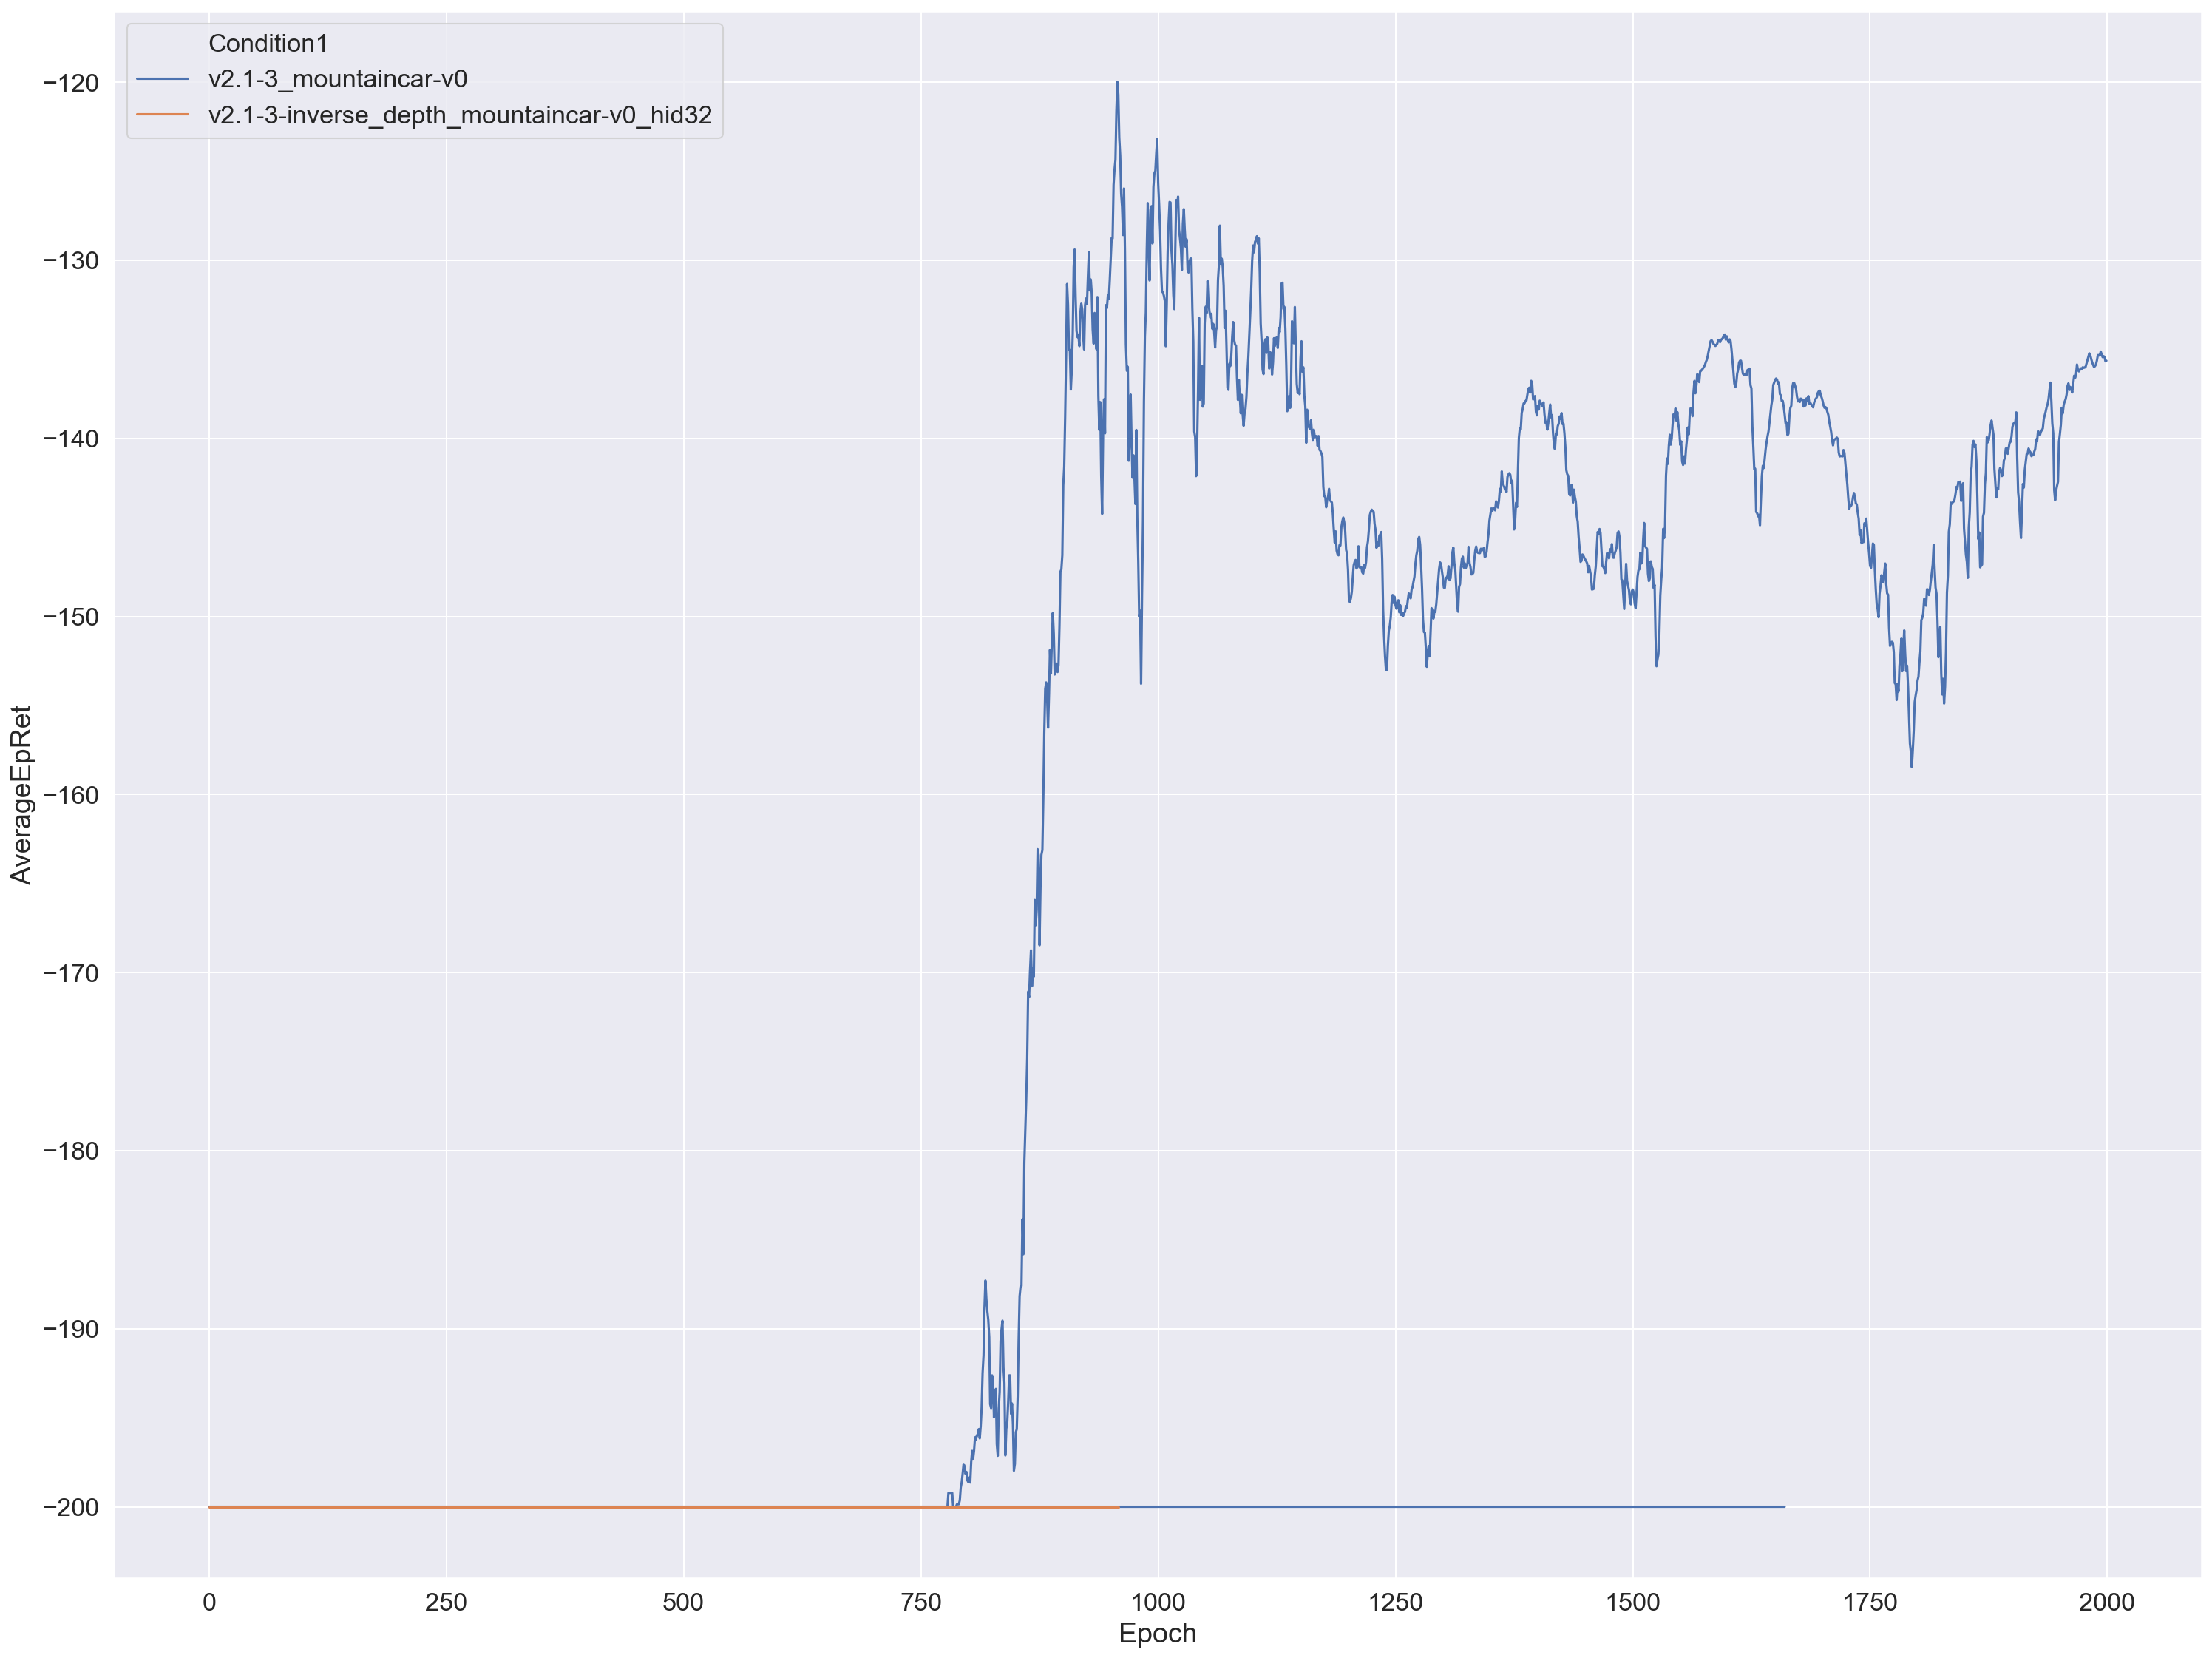

In [38]:
plt.figure(figsize=(20, 15), dpi=150)

# To show individual runs, add arguments: units='Condition2, estimator=None
# To compare runs with different epoch lengts, use:xaxis='TotalEnvInteracts'

plot_data(datasets, smooth=5, units='Condition2', estimator=None)
plt.show()

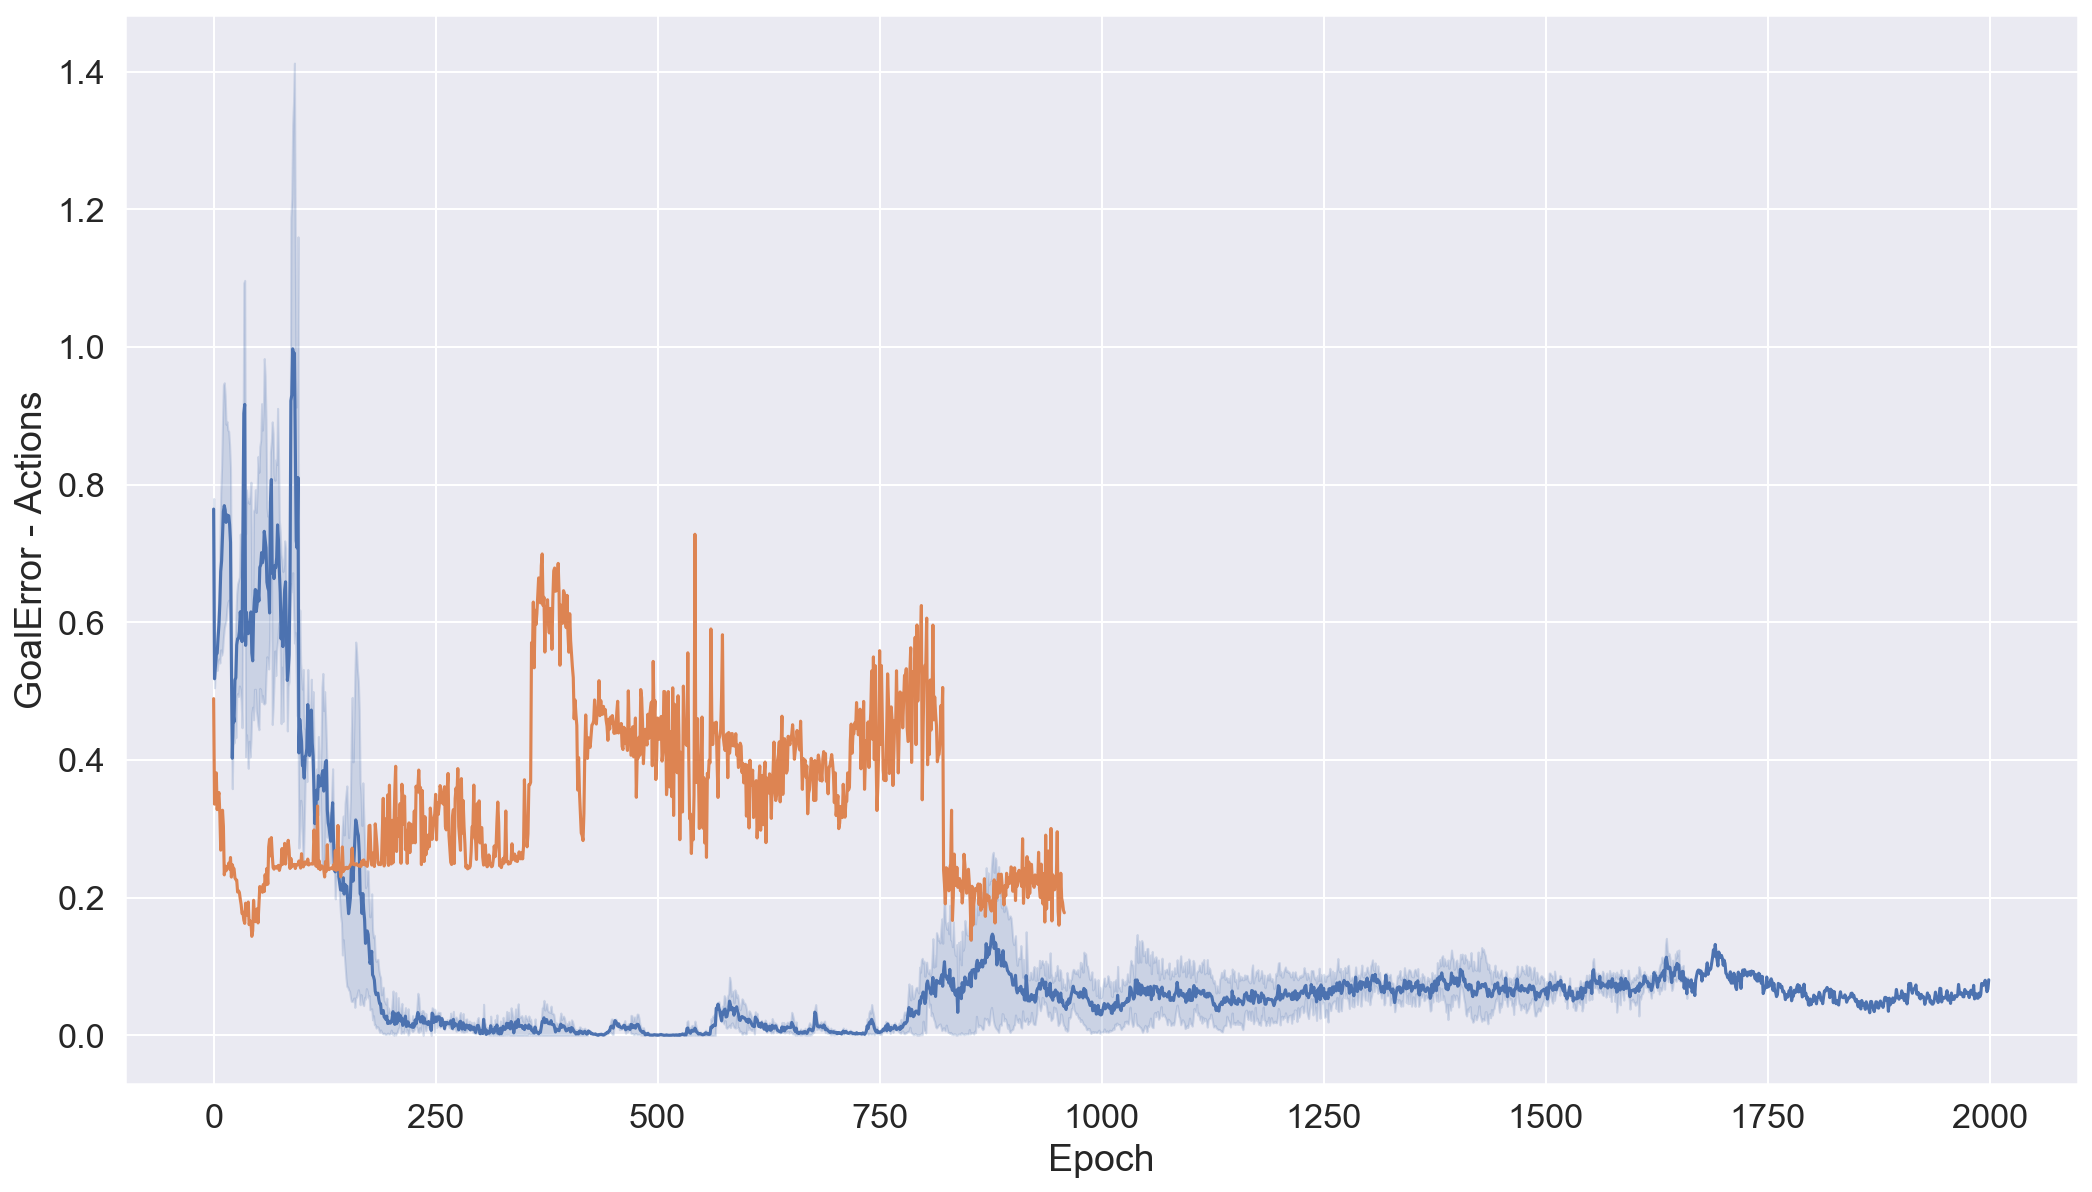

In [39]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='GoalError - Actions', smooth=1, show_legend=False, estimator='mean')
plt.show()

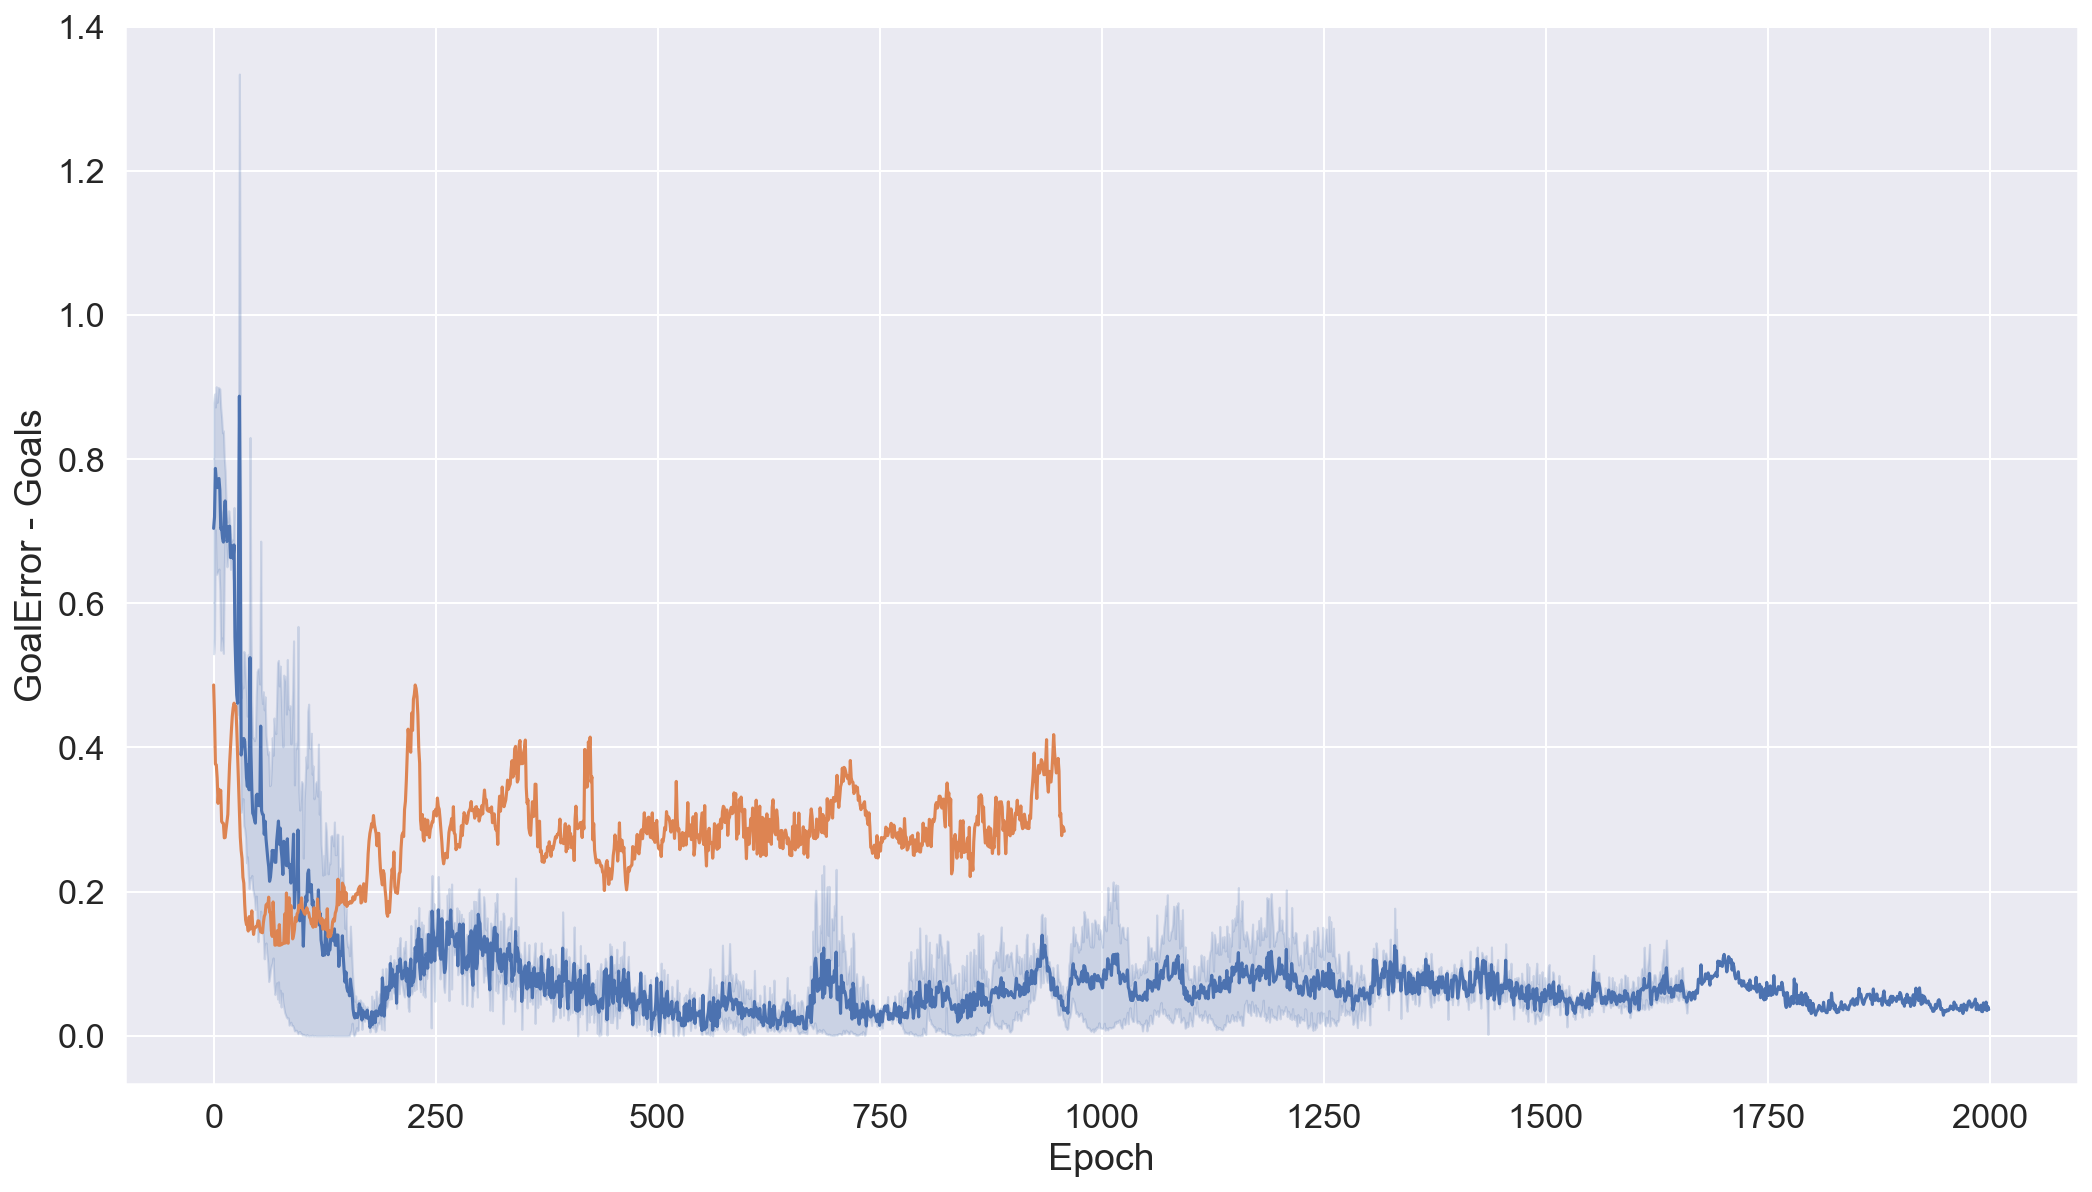

In [40]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='GoalError - Goals', smooth=1, show_legend=False, estimator='mean')
plt.show()

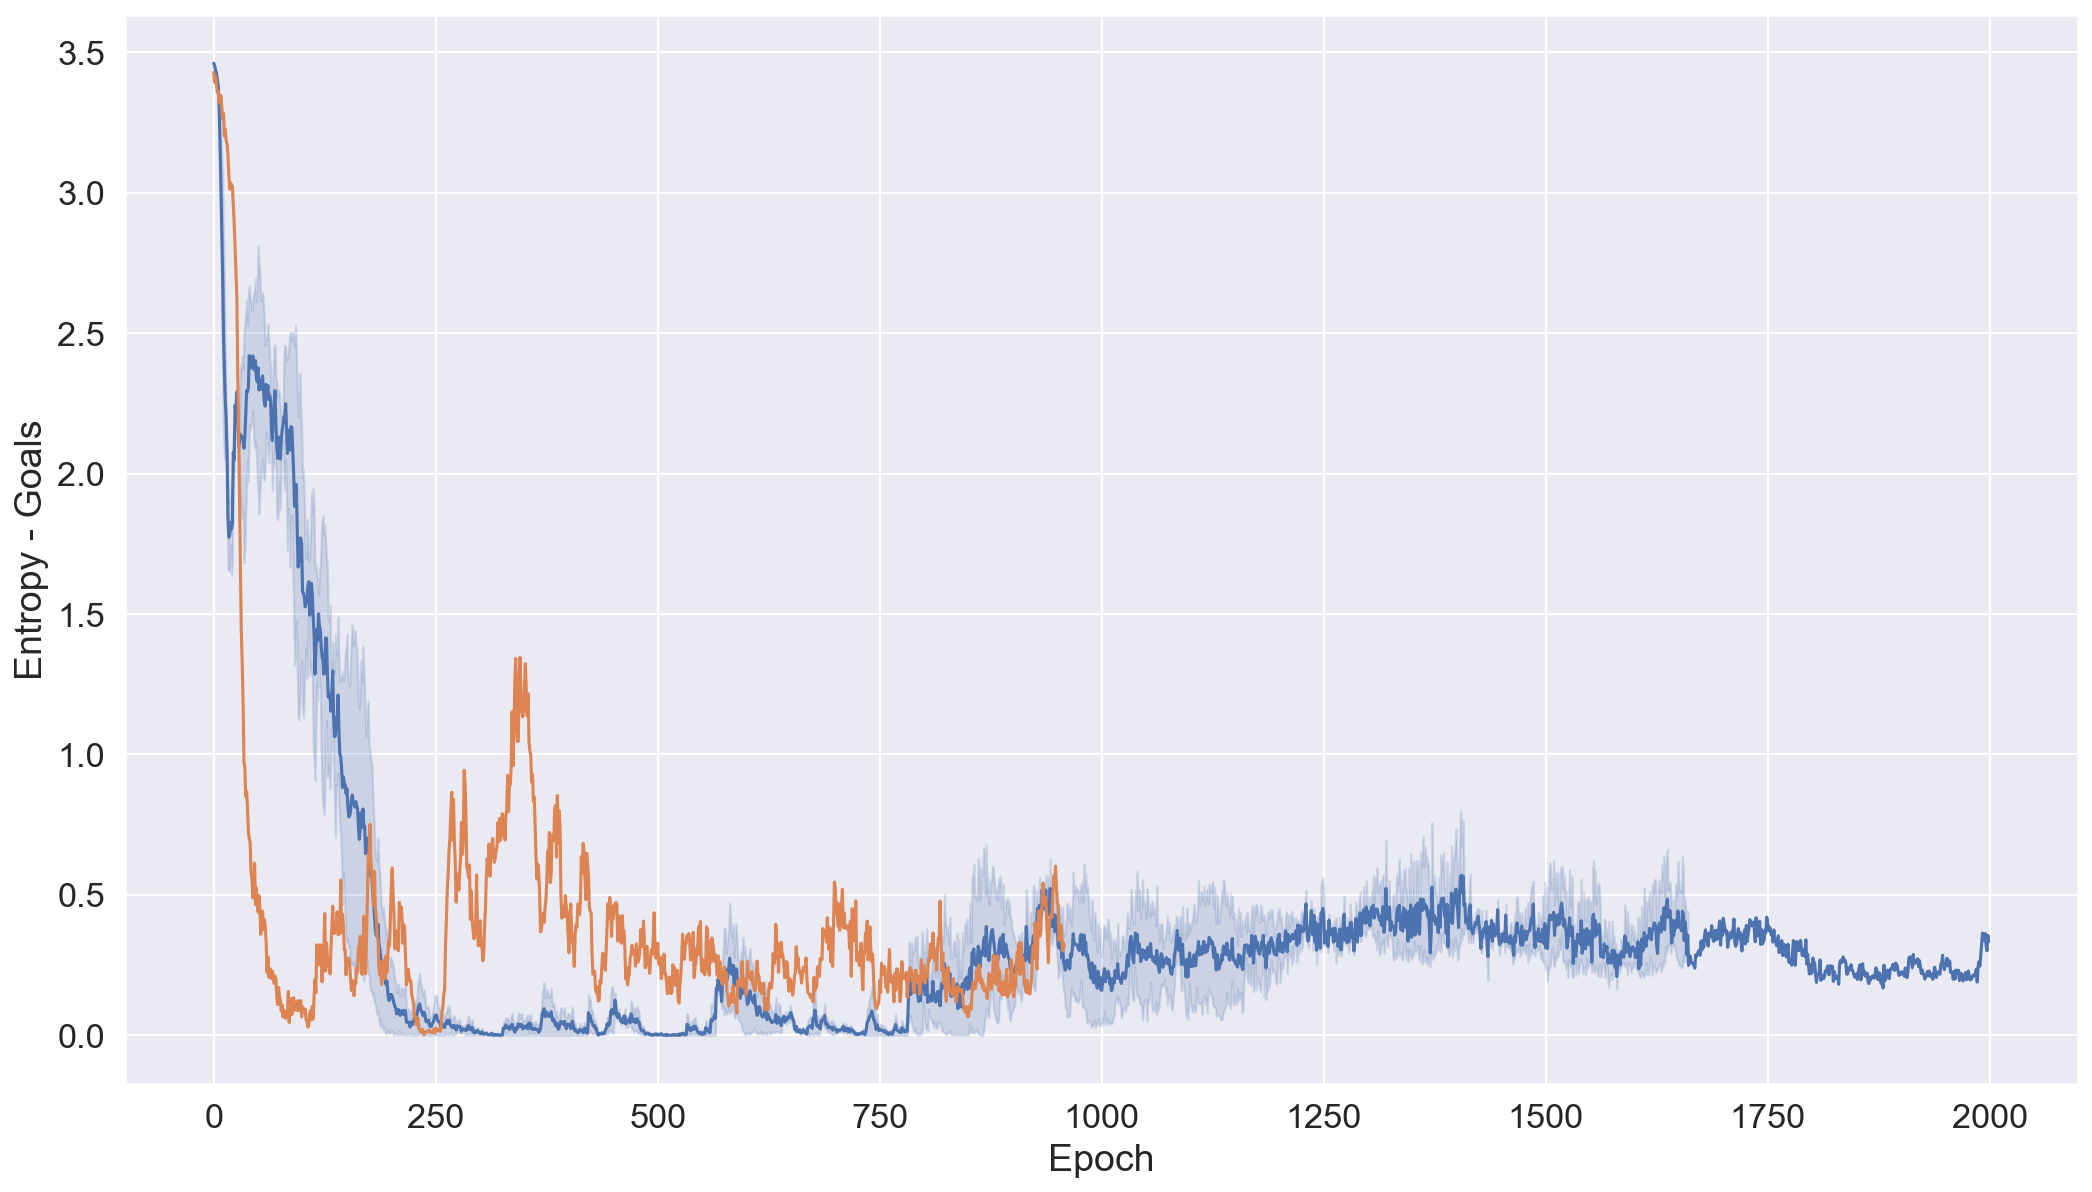

In [41]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='Entropy - Goals', smooth=1, show_legend=False)
plt.show()

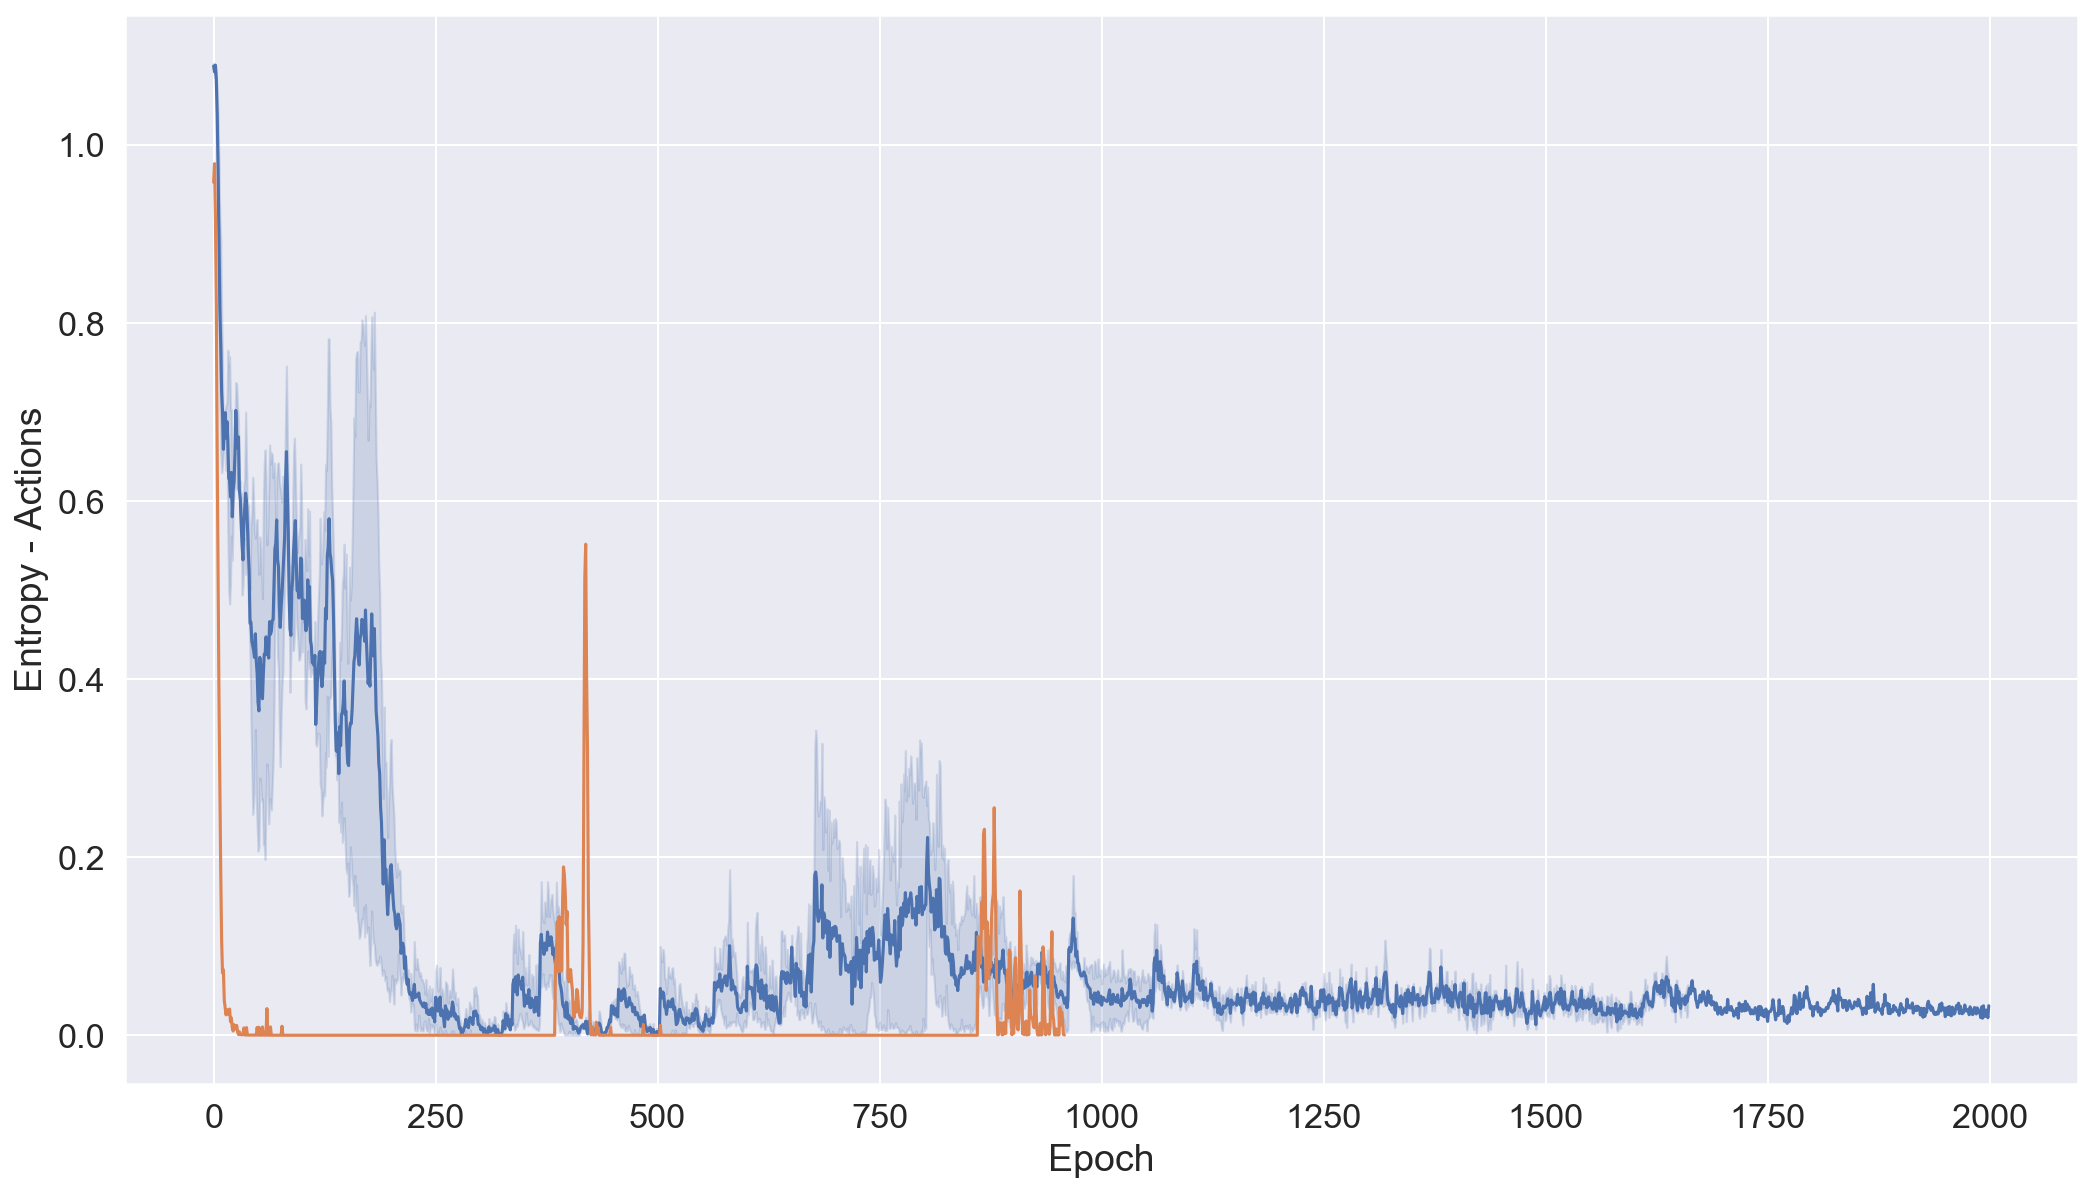

In [42]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='Entropy - Actions', smooth=1, show_legend=False)
plt.show()

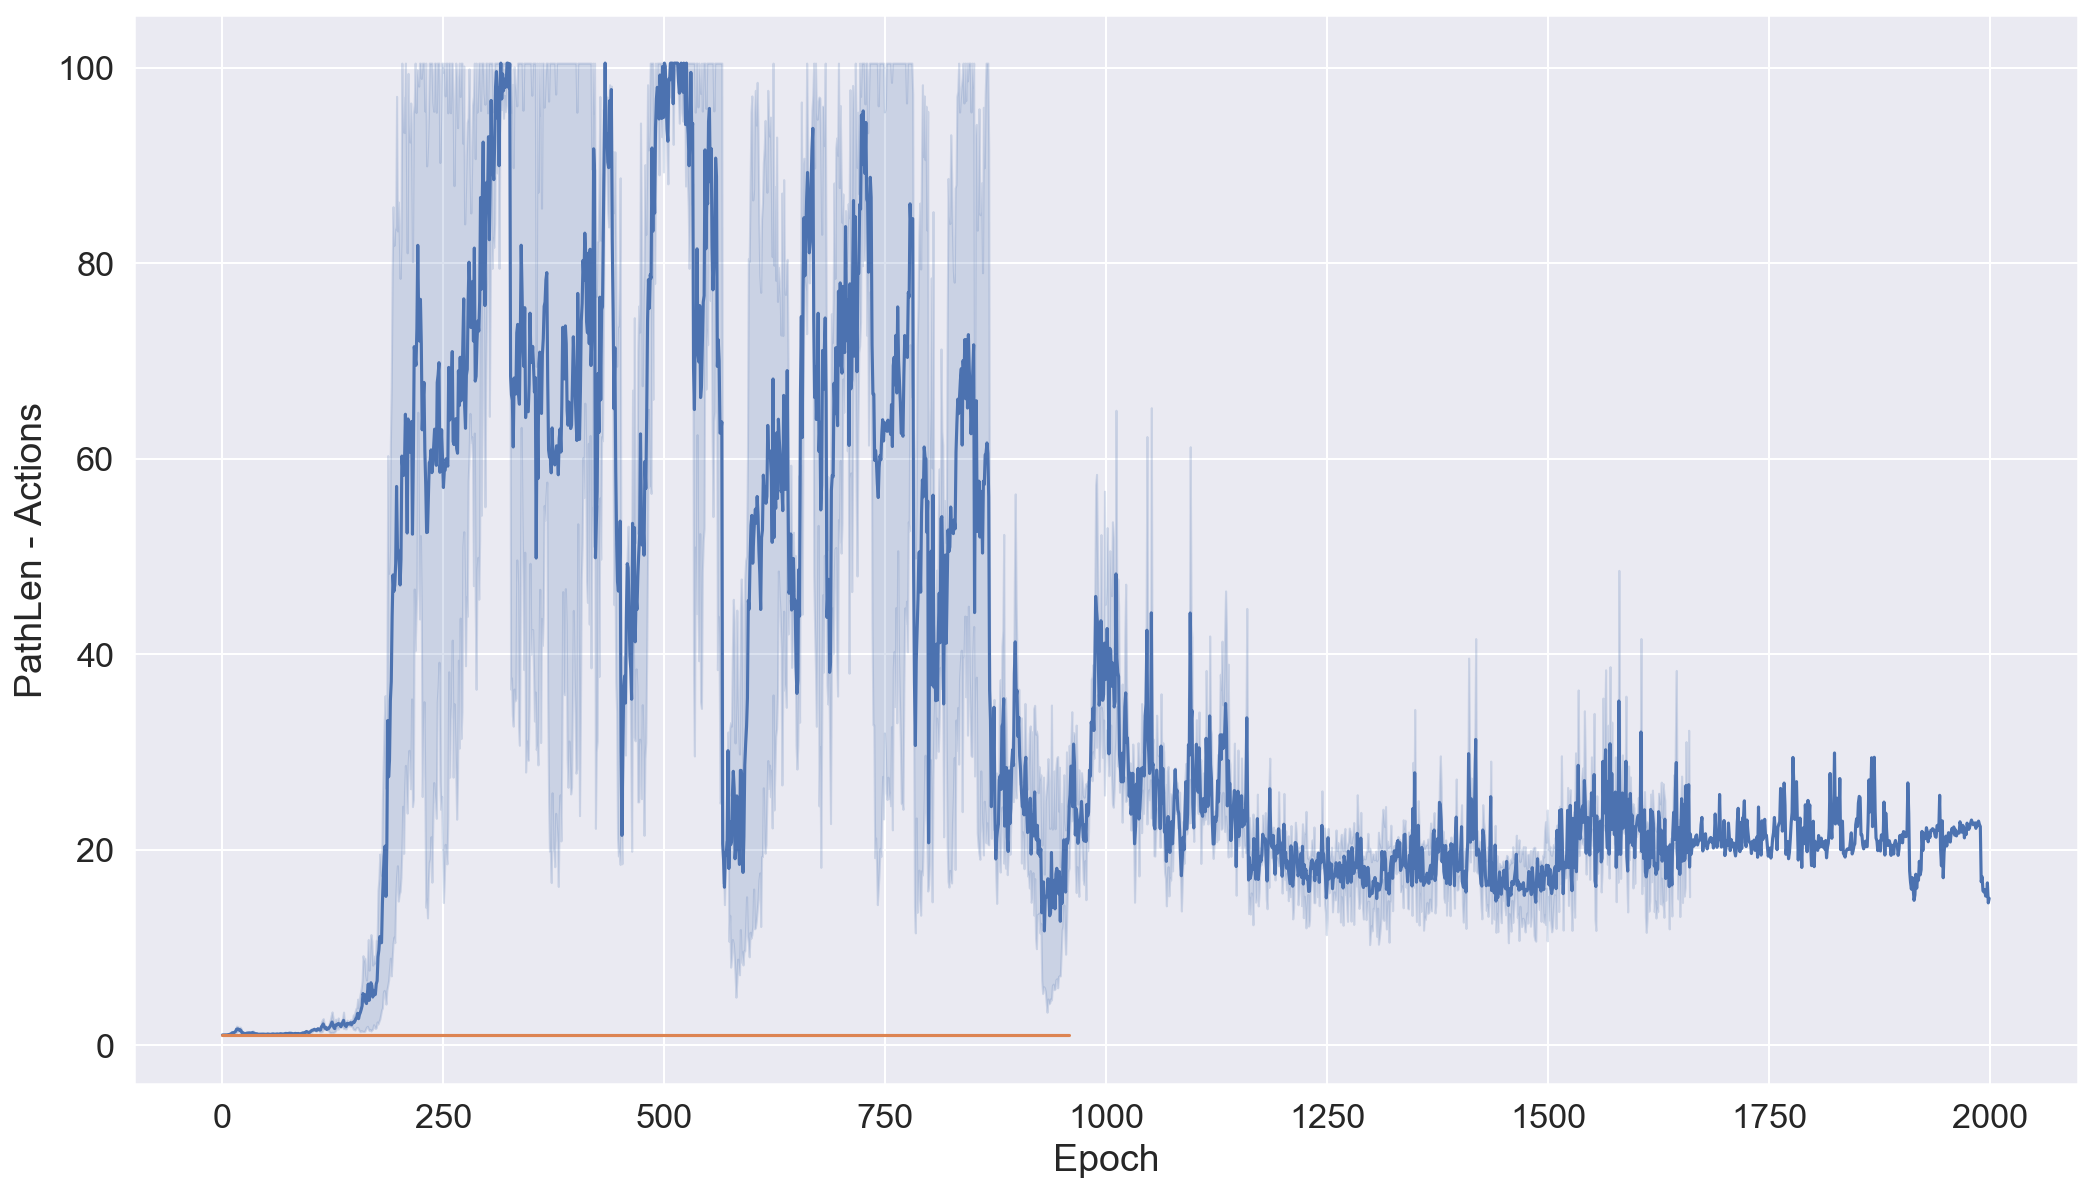

In [43]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='PathLen - Actions', smooth=1, show_legend=False)
plt.show()

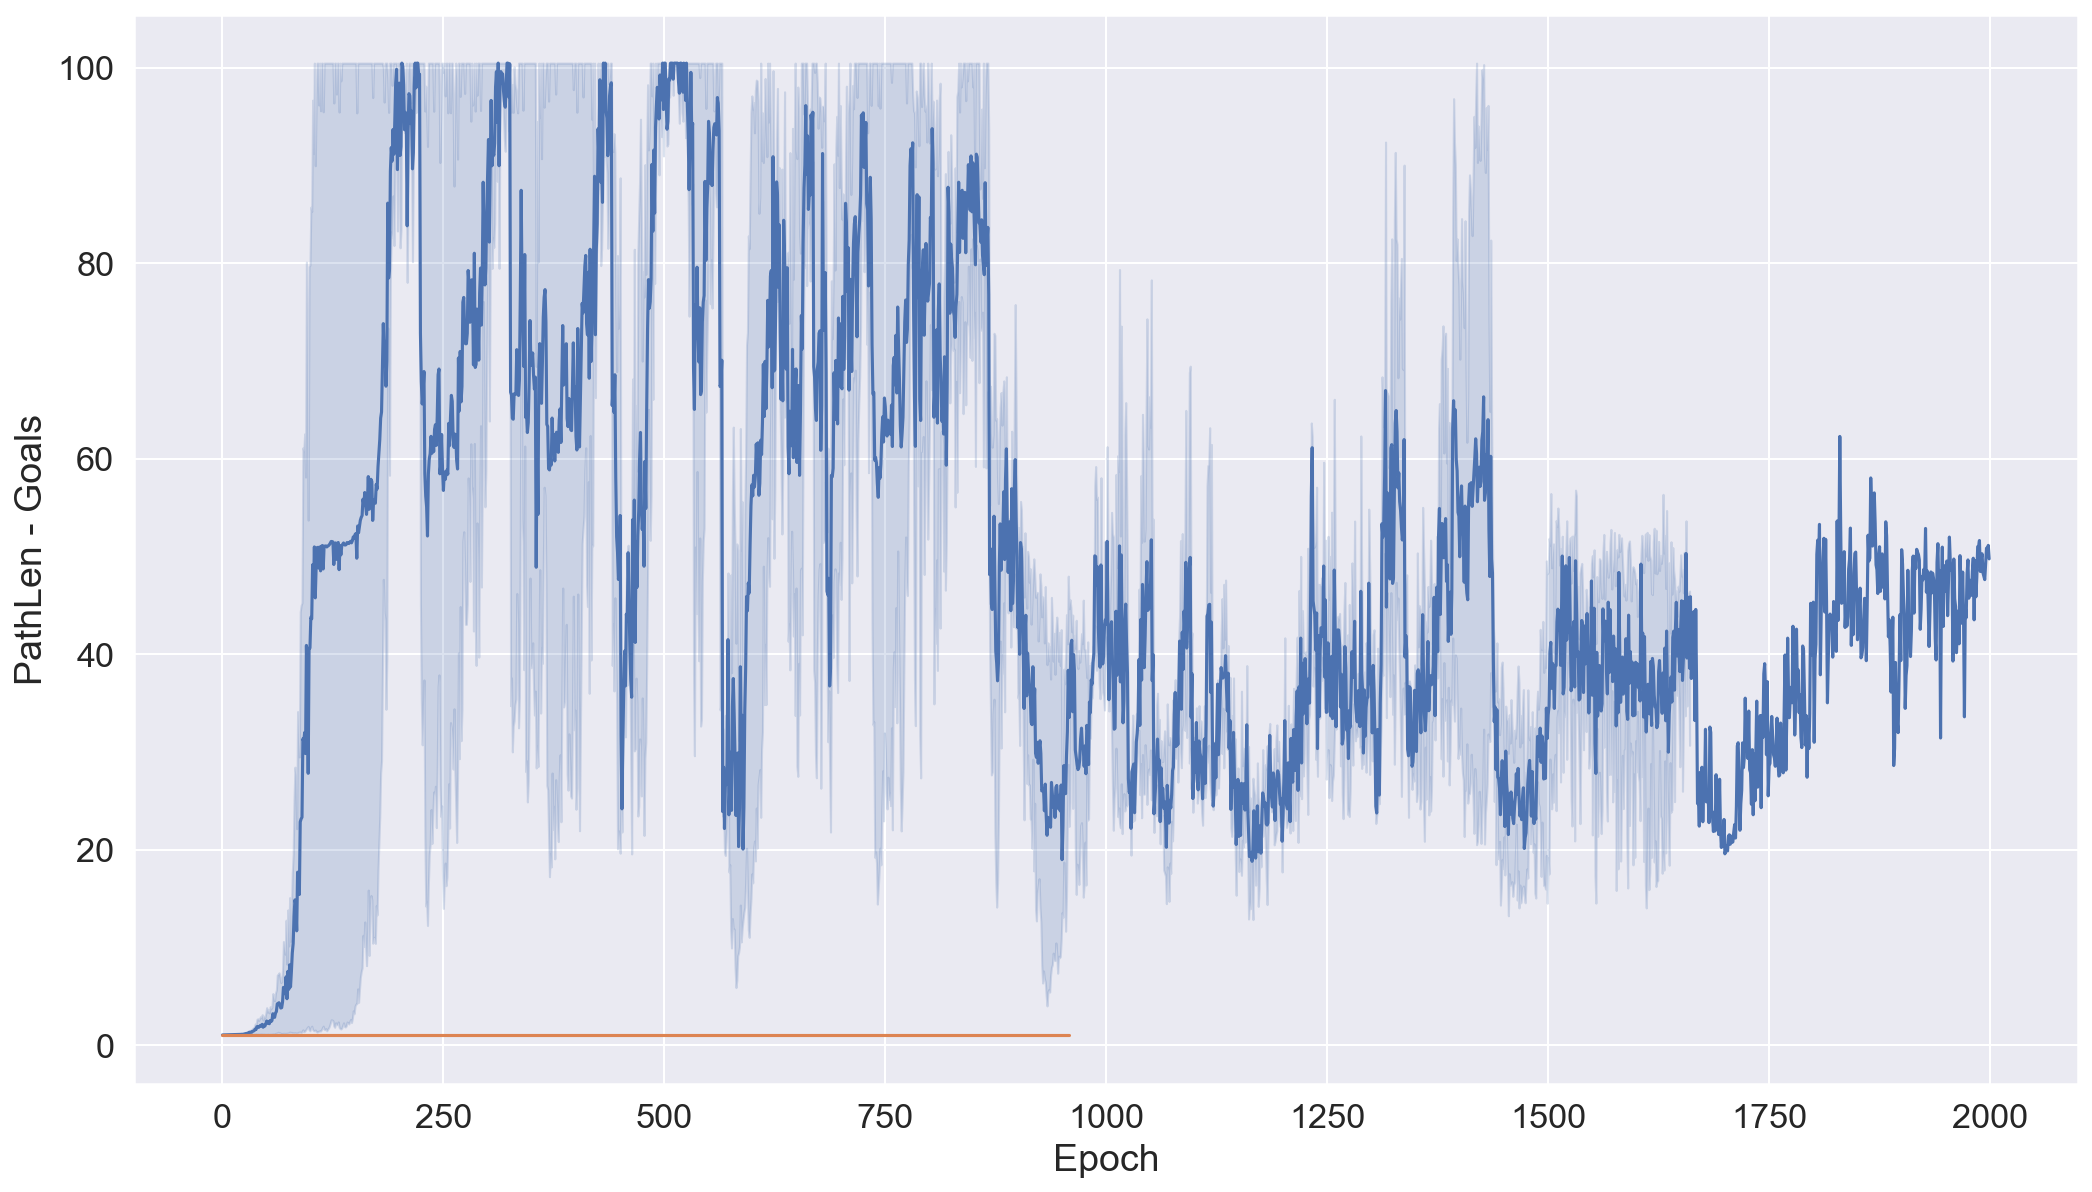

In [44]:
plt.figure(figsize=(14, 8), dpi=150)
plot_data(datasets, value='PathLen - Goals', smooth=1, show_legend=False)
plt.show()